In [ ]:
# pip install pyspark

# **Analyse des ventes au détail**

# **LA DATA ECLAIRE LES DYNAMIQUES DE VENTES ET GUIDE LES DECISIONS**



### Définitions du Dataset "Supermarket Sales"

Ce tableau de données contient les informations clés pour analyser les ventes d'un supermarché. Chaque colonne est essentielle pour comprendre le comportement des clients, les performances des produits et les tendances de vente.

---

### **Détails de la transaction**

* **`Invoice ID`** : L'identifiant unique de chaque facture, permettant de distinguer chaque transaction.
* **`Date`**  & **`Time`**  : La date et l'heure exactes de la transaction.
* **`Payment`** : La méthode de paiement utilisée (espèces, carte de crédit ou porte-monnaie électronique).
* **`Rating`**  : La note de satisfaction donnée par le client, sur une échelle de 1 à 10.

---

### **Produits & Finances**

* **`Product line`**  : La catégorie du produit (par exemple, "santé et beauté" ou "accessoires électroniques").
* **`Unit price`** : Le prix d'une seule unité du produit.
* **`Quantity`**  : Le nombre d'unités achetées dans la transaction.
* **`cogs`** : Le **coût des marchandises vendues**, c'est-à-dire le montant total de la vente hors taxes.
* **`Tax 5%`**  : La TVA de 5 % appliquée sur le montant total des produits.
* **`Sales`** : Le montant total de la vente, incluant la TVA.
* **`gross margin percentage`** : Le pourcentage de la marge brute, qui est fixe à environ 4,76 % pour ce dataset.
* **`gross income`** : Le bénéfice brut, qui correspond au montant de la TVA payée.

---

### **Informations sur le client & le magasin**

* **`City`** : La ville où la transaction a eu lieu : Yangon, Naypyitaw ou Mandalay.
* **`Branch`**  : Le code de la succursale du supermarché (A, B ou C).
* **`Customer type`**  : Le statut du client — **membre** du programme de fidélité ou client **occasionnel**.
* **`Gender`**  : Le genre du client.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

from pyspark.sql.functions import col , sum
from pyspark.sql import functions as F

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spark = SparkSession.builder.appName('analyse_vente').getOrCreate()

# **Chargement du DataSet**

In [ ]:
# !ls "/content/drive/MyDrive"

In [ ]:
data = spark.read.format("csv").options(header=True, inferSchema=True).load("/content/drive/MyDrive/SuperMarket_Analysis.csv")


# **Exploration des données**

In [ ]:
data.toPandas()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
print(f" {data.count()} ligne(s) et {len(data.columns)} colonne(s)")

 1000 ligne(s) et 17 colonne(s)


In [ ]:
data.printSchema()

root
 |-- Invoice ID: string (nullable = true)
 |-- Branch: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Customer type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Product line: string (nullable = true)
 |-- Unit price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Tax 5%: double (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Payment: string (nullable = true)
 |-- cogs: double (nullable = true)
 |-- gross margin percentage: double (nullable = true)
 |-- gross income: double (nullable = true)
 |-- Rating: double (nullable = true)



In [ ]:
data.describe().show()

+-------+-----------+------+--------+-------------+------+--------------------+------------------+------------------+------------------+------------------+--------+-----------+-------+------------------+-----------------------+------------------+------------------+
|summary| Invoice ID|Branch|    City|Customer type|Gender|        Product line|        Unit price|          Quantity|            Tax 5%|             Sales|    Date|       Time|Payment|              cogs|gross margin percentage|      gross income|            Rating|
+-------+-----------+------+--------+-------------+------+--------------------+------------------+------------------+------------------+------------------+--------+-----------+-------+------------------+-----------------------+------------------+------------------+
|  count|       1000|  1000|    1000|         1000|  1000|                1000|              1000|              1000|              1000|              1000|    1000|       1000|   1000|              1000

In [ ]:
from pyspark.sql.types import NumericType

colonnes_numeriques = [ colonne.name for colonne in data.schema.fields if isinstance(colonne.dataType , NumericType) ]
print(f" les colonnes numeriques : {colonnes_numeriques}")

 les colonnes numeriques : ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
for colonne in colonnes_numeriques :
  data.select(colonne).describe().show()

+-------+------------------+
|summary|        Unit price|
+-------+------------------+
|  count|              1000|
|   mean| 55.67212999999998|
| stddev|26.494628347919786|
|    min|             10.08|
|    max|             99.96|
+-------+------------------+

+-------+------------------+
|summary|          Quantity|
+-------+------------------+
|  count|              1000|
|   mean|              5.51|
| stddev|2.9234305954556956|
|    min|                 1|
|    max|                10|
+-------+------------------+

+-------+------------------+
|summary|            Tax 5%|
+-------+------------------+
|  count|              1000|
|   mean|15.379369000000002|
| stddev| 11.70882548099866|
|    min|            0.5085|
|    max|             49.65|
+-------+------------------+

+-------+------------------+
|summary|             Sales|
+-------+------------------+
|  count|              1000|
|   mean|322.96674900000005|
| stddev| 245.8853351009718|
|    min|           10.6785|
|    max|  

Les colonnes numériques : ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


<Figure size 800x400 with 0 Axes>

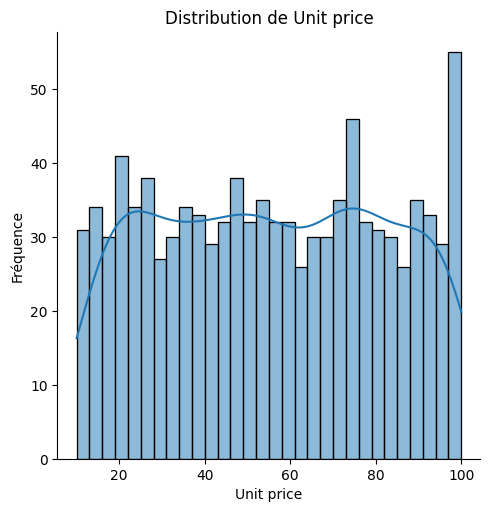

<Figure size 800x400 with 0 Axes>

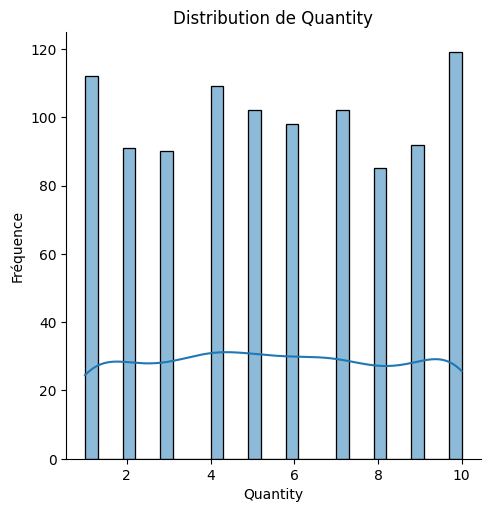

<Figure size 800x400 with 0 Axes>

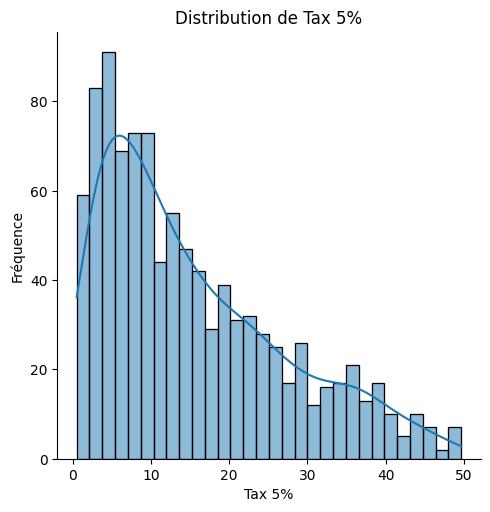

<Figure size 800x400 with 0 Axes>

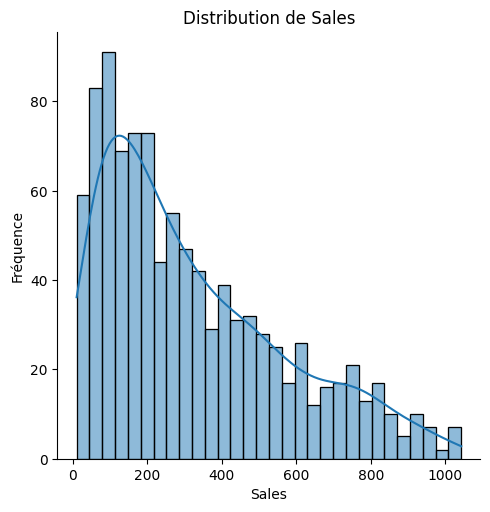

<Figure size 800x400 with 0 Axes>

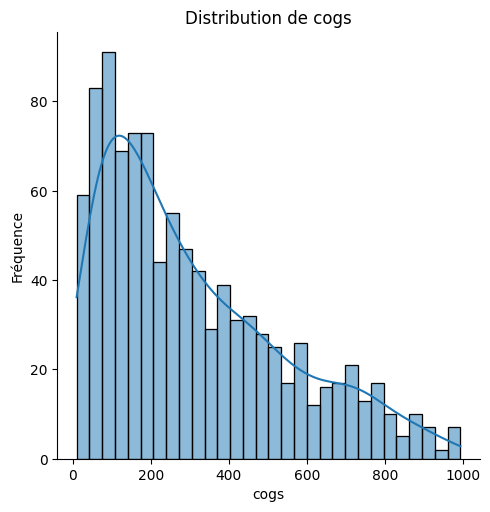

<Figure size 800x400 with 0 Axes>

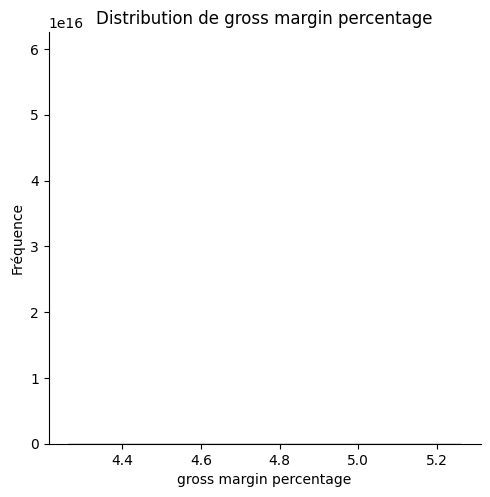

<Figure size 800x400 with 0 Axes>

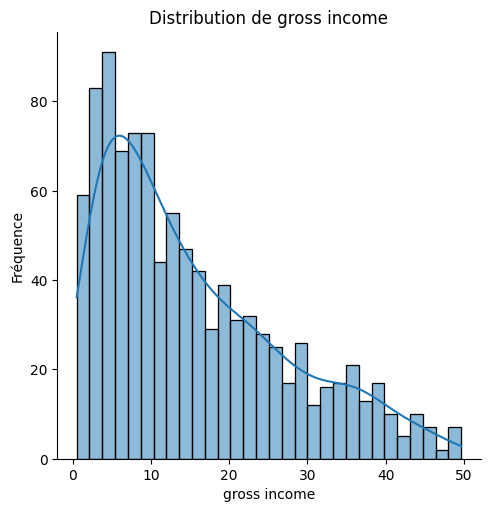

<Figure size 800x400 with 0 Axes>

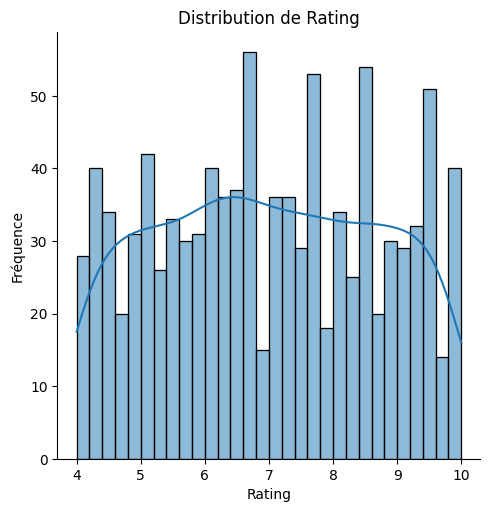

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import NumericType

colonnes_numeriques = [colonne.name for colonne in data.schema.fields if isinstance(colonne.dataType, NumericType)]
print(f"Les colonnes numériques : {colonnes_numeriques}")



data_pd = data.select(colonnes_numeriques).toPandas()

for col in colonnes_numeriques:
    plt.figure(figsize=(8,4))
    sns.displot(data_pd[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

In [ ]:
data.select("City").distinct().show()

+---------+
|     City|
+---------+
|Naypyitaw|
| Mandalay|
|   Yangon|
+---------+



In [ ]:
data.groupBy("Product line").count().show()

+--------------------+-----+
|        Product line|count|
+--------------------+-----+
|  Home and lifestyle|  160|
| Fashion accessories|  178|
|   Health and beauty|  152|
|Electronic access...|  170|
|  Food and beverages|  174|
|   Sports and travel|  166|
+--------------------+-----+



In [ ]:
data.groupBy("Gender").count().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  571|
|  Male|  429|
+------+-----+



*Le DataFrame est composé de plus de femme avec 571 et 429 hommes*

In [ ]:
data.select("Branch").distinct().show()

+------+
|Branch|
+------+
| Cairo|
|  Alex|
|  Giza|
+------+



# **Nettoyage & préparation**

In [ ]:
for col in data.columns:
  print(col , ":" , data.filter( data[col] == "?").count() )

Invoice ID : 0
Branch : 0
City : 0
Customer type : 0
Gender : 0
Product line : 0
Unit price : 0
Quantity : 0
Tax 5% : 0
Sales : 0
Date : 0
Time : 0
Payment : 0
cogs : 0
gross margin percentage : 0
gross income : 0
Rating : 0


In [ ]:
[ (name,dtype) for name , dtype in data.dtypes]

[('Invoice ID', 'string'),
 ('Branch', 'string'),
 ('City', 'string'),
 ('Customer type', 'string'),
 ('Gender', 'string'),
 ('Product line', 'string'),
 ('Unit price', 'double'),
 ('Quantity', 'int'),
 ('Tax 5%', 'double'),
 ('Sales', 'double'),
 ('Date', 'string'),
 ('Time', 'string'),
 ('Payment', 'string'),
 ('cogs', 'double'),
 ('gross margin percentage', 'double'),
 ('gross income', 'double'),
 ('Rating', 'double')]

In [ ]:
# for column in data.columns :
#   a = data.filter( col(column).isNull() ).count()
#   print(f"{column} : {a}")

In [ ]:
from pyspark.sql.functions import to_date, col

data = data.withColumn("Date", to_date(col("Date"), "M/d/yyyy"))

# **Vue d’ensemble**

**Chiffre d’affaires global**

In [ ]:
Ca_total = data.agg(F.sum('Sales').alias('CA_TOTAAL'))
Ca_total.show()

+------------------+
|         CA_TOTAAL|
+------------------+
|322966.74900000007|
+------------------+



**Marge totale**

In [ ]:
marge_totale = data.agg(F.sum('gross income').alias('MARGE_TOTALE'))
marge_totale.show()

+------------------+
|      MARGE_TOTALE|
+------------------+
|15379.369000000002|
+------------------+



**Panier moyen**

In [ ]:
panier_moyen = data.groupBy('Invoice ID').agg(F.sum('Sales').alias('venteparfacture')).agg(F.avg('venteparfacture').alias('PANIER_MOYEN'))
panier_moyen.show()

+-----------------+
|     PANIER_MOYEN|
+-----------------+
|322.9667489999996|
+-----------------+



In [ ]:
from pyspark.sql.types import NumericType

colonnes_numeriques = [colonne.name for colonne in data.schema.fields if isinstance(colonne.dataType , NumericType)]
print(f"Les colonnes numériques : {colonnes_numeriques}")


Les colonnes numériques : ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
# Conversion
data_pd = data.select(colonnes_numeriques).toPandas()


In [ ]:
corr_matrix = data_pd.corr()
print(corr_matrix)


                         Unit price  Quantity    Tax 5%     Sales      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Sales                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 

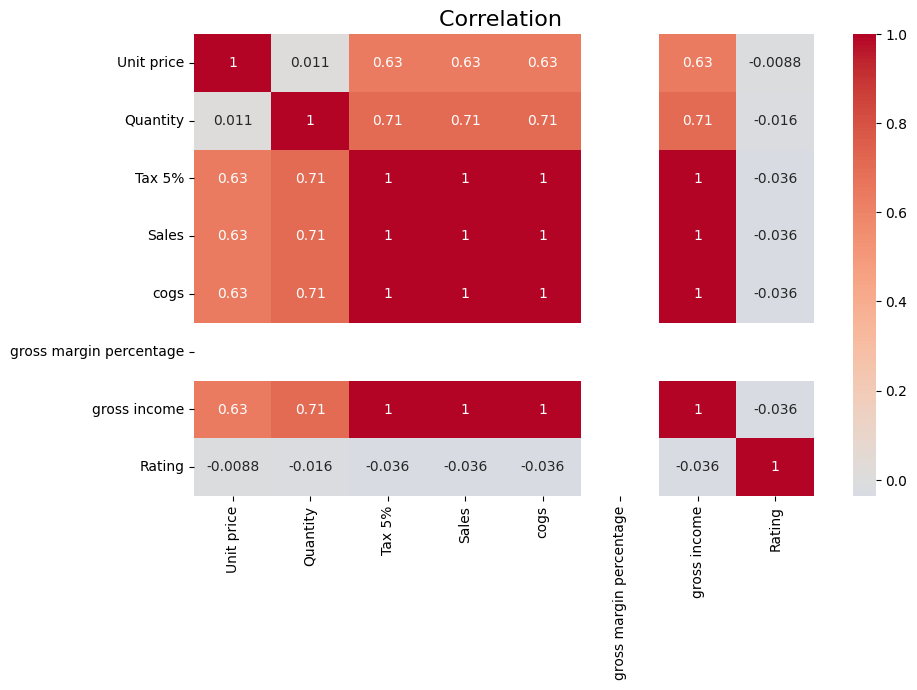

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation ", fontsize=16)
plt.show()

# **Analyse géographique**

**Chiffre d'affaires par ville**

In [ ]:
Ca_ville = data.groupBy('City').agg(F.sum('Sales').alias('CA/VILLE')).orderBy(F.desc('CA/VILLE'))
Ca_ville.show()

+---------+------------------+
|     City|          CA/VILLE|
+---------+------------------+
|Naypyitaw|110568.70649999994|
|   Yangon| 106200.3705000001|
| Mandalay|106197.67199999996|
+---------+------------------+



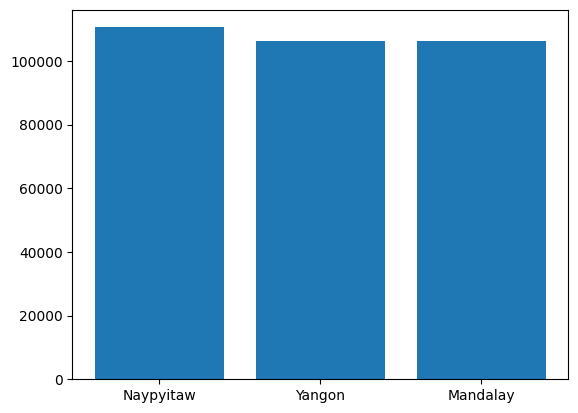

In [ ]:
ca_par_ville = Ca_ville.toPandas()
plt.bar(ca_par_ville['City'] , ca_par_ville['CA/VILLE']  )
plt.show()

**CA & MARGE / VILLE**

In [ ]:
VCAM = data.groupBy('City').agg(F.sum('Sales').alias('CA') , F.sum('gross income').alias('MARGE'))
VCAM.show()

+---------+------------------+-----------------+
|     City|                CA|            MARGE|
+---------+------------------+-----------------+
|Naypyitaw|110568.70649999994|5265.176500000002|
| Mandalay|106197.67199999996|5057.032000000003|
|   Yangon| 106200.3705000001|5057.160500000002|
+---------+------------------+-----------------+



**Les produits les plus consommés / ville**

In [ ]:
from pyspark.sql import functions as F

qte_produit_ville = (data.groupBy("City", "Product line").agg(F.sum("Quantity").alias("Total_Quantity")))
qte_produit_ville.show()

+---------+--------------------+--------------+
|     City|        Product line|Total_Quantity|
+---------+--------------------+--------------+
|Naypyitaw|Electronic access...|           333|
| Mandalay|   Health and beauty|           320|
|Naypyitaw|   Sports and travel|           265|
|   Yangon|Electronic access...|           322|
| Mandalay|Electronic access...|           316|
| Mandalay| Fashion accessories|           297|
|Naypyitaw|  Food and beverages|           369|
|Naypyitaw| Fashion accessories|           342|
|   Yangon|   Sports and travel|           333|
|   Yangon|  Home and lifestyle|           371|
|Naypyitaw|  Home and lifestyle|           245|
|Naypyitaw|   Health and beauty|           277|
| Mandalay|  Food and beverages|           270|
| Mandalay|   Sports and travel|           322|
|   Yangon|  Food and beverages|           313|
|   Yangon| Fashion accessories|           263|
| Mandalay|  Home and lifestyle|           295|
|   Yangon|   Health and beauty|        

In [ ]:
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("City").orderBy(F.desc("Total_Quantity"))


produit_top_ville = (qte_produit_ville.withColumn("rank", F.row_number().over(windowSpec)).filter(F.col("rank") == 1).drop("rank"))

produit_top_ville.show()

+---------+------------------+--------------+
|     City|      Product line|Total_Quantity|
+---------+------------------+--------------+
| Mandalay| Sports and travel|           322|
|Naypyitaw|Food and beverages|           369|
|   Yangon|Home and lifestyle|           371|
+---------+------------------+--------------+



**NBR TRANSACTION / VILLE**

In [ ]:
TV = data.groupBy('City').agg(F.count_distinct('Invoice ID').alias('TRANSACTION/VILLE'))
TV.show()

+---------+-----------------+
|     City|TRANSACTION/VILLE|
+---------+-----------------+
|Naypyitaw|              328|
| Mandalay|              332|
|   Yangon|              340|
+---------+-----------------+



In [ ]:
from pyspark.sql.functions import sum, count, col

# ======================= Calcul du chiffre d'affaires total et du nombre de transactions par ville =======================
panier_moyen_df = data.groupBy("City").agg(sum("Sales").alias("total_sales"),count("*").alias("number_of_transactions"))



# ======================= Calcul du panier moyen en divisant le chiffre d'affaires total par le nombre de transactions =======================
panier_moyen_df = panier_moyen_df.withColumn("Panier Moyen",col("total_sales") / col("number_of_transactions"))


panier_moyen_df.show()

+---------+------------------+----------------------+------------------+
|     City|       total_sales|number_of_transactions|      Panier Moyen|
+---------+------------------+----------------------+------------------+
|Naypyitaw|110568.70649999994|                   328|337.09971493902424|
| Mandalay|106197.67199999996|                   332|319.87250602409625|
|   Yangon| 106200.3705000001|                   340|312.35403088235324|
+---------+------------------+----------------------+------------------+



**Chiffre d'affaires par ville en fonction du mois**

In [ ]:
ventes_janvier = data.filter((data["Date"] >= "2019-01-01") & (data["Date"] <= "2019-01-31"))
ventes_janvier.groupBy("City").agg(F.sum("Sales").alias("CA_Janvier")).orderBy("CA_Janvier").show()

+---------+------------------+
|     City|        CA_Janvier|
+---------+------------------+
| Mandalay|37176.058500000014|
|   Yangon|        38681.1285|
|Naypyitaw| 40434.68099999999|
+---------+------------------+



In [ ]:
vente_fevrier = data.filter( (data["Date"] >= "2019-02-01" ) & (data["Date"] <= "2019-02-28" ) )
vente_fevrier.groupBy("City").agg(F.sum("Sales").alias("CA_Fevrier")).orderBy("CA_Fevrier").show()

+---------+------------------+
|     City|        CA_Fevrier|
+---------+------------------+
|   Yangon|29860.120500000005|
|Naypyitaw|32934.982500000006|
| Mandalay| 34424.27099999999|
+---------+------------------+



In [ ]:
vente_fevrier = data.filter( (data["Date"] >= "2019-03-01" ) & (data["Date"] <= "2019-03-31" ) )
vente_fevrier.groupBy("City").agg(F.sum("Sales").alias("CA_Mars")).orderBy("CA_Mars").show()

+---------+-----------------+
|     City|          CA_Mars|
+---------+-----------------+
| Mandalay|       34597.3425|
|Naypyitaw|        37199.043|
|   Yangon|37659.12150000001|
+---------+-----------------+



**Moyens de paiement /VILLE**

In [ ]:
payment_count_by_city = data.groupBy('City', 'Payment').count().orderBy('City', 'count', ascending=False)
payment_count_by_city.show()

+---------+-----------+-----+
|     City|    Payment|count|
+---------+-----------+-----+
|   Yangon|    Ewallet|  126|
|   Yangon|       Cash|  110|
|   Yangon|Credit card|  104|
|Naypyitaw|       Cash|  124|
|Naypyitaw|    Ewallet|  106|
|Naypyitaw|Credit card|   98|
| Mandalay|    Ewallet|  113|
| Mandalay|       Cash|  110|
| Mandalay|Credit card|  109|
+---------+-----------+-----+



In [ ]:
satisfaction = data.groupBy('City').agg(F.avg('Rating').alias('satisfaction_moyenne')).orderBy(F.desc('satisfaction_moyenne'))
satisfaction.show()

+---------+--------------------+
|     City|satisfaction_moyenne|
+---------+--------------------+
|Naypyitaw|   7.072865853658538|
|   Yangon|   7.027058823529413|
| Mandalay|  6.8180722891566266|
+---------+--------------------+



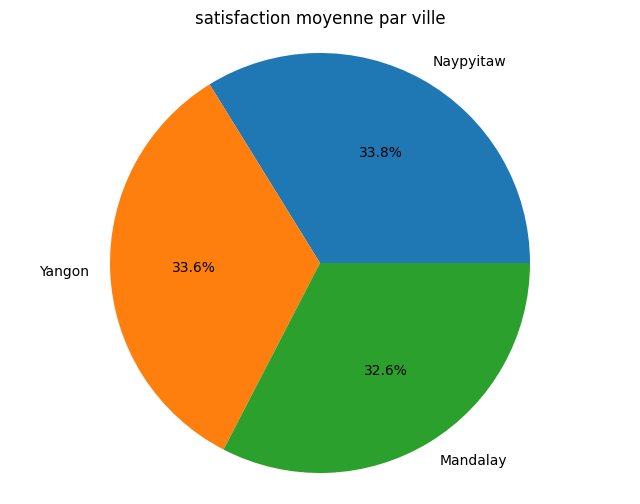

In [ ]:
SV = satisfaction.toPandas()

plt.figure(figsize=(8, 6))
plt.pie(SV['satisfaction_moyenne'] ,  labels = SV['City']  , autopct='%1.1F%%' )
plt.title("satisfaction moyenne par ville")
plt.axis('equal')
plt.show()

# **PRODUIT**

In [ ]:
produit_prix = data.groupBy("Product line").agg(F.max("Unit price").alias("Max_Unit_Price")).orderBy(F.desc("Max_Unit_Price"))
produit_prix.show()

+--------------------+--------------+
|        Product line|Max_Unit_Price|
+--------------------+--------------+
|   Health and beauty|         99.96|
|   Sports and travel|         99.96|
|  Home and lifestyle|         99.92|
| Fashion accessories|         99.89|
|  Food and beverages|         99.79|
|Electronic access...|         99.73|
+--------------------+--------------+



**CA / PRODUIT**

In [ ]:
Ca_produit = data.groupBy('Product line').agg(F.sum('Sales').alias('CA_PRODUIT')).orderBy(F.desc('CA_PRODUIT'))
Ca_produit.show()

+--------------------+------------------+
|        Product line|        CA_PRODUIT|
+--------------------+------------------+
|  Food and beverages|56144.844000000005|
|   Sports and travel|55122.826499999996|
|Electronic access...|54337.531500000005|
| Fashion accessories|         54305.895|
|  Home and lifestyle| 53861.91300000001|
|   Health and beauty|49193.739000000016|
+--------------------+------------------+



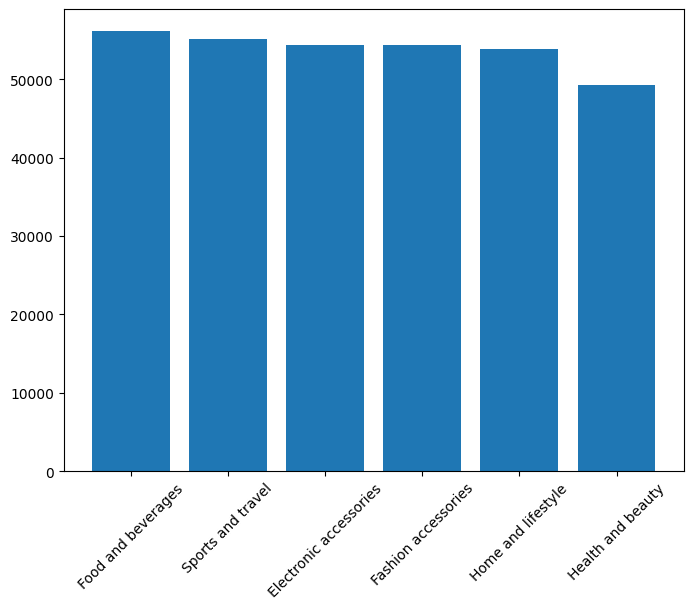

In [ ]:
ca_produit = Ca_produit.toPandas()

plt.figure(figsize=(8,6))
plt.bar( ca_produit['Product line'] , ca_produit['CA_PRODUIT'] )
plt.xticks(rotation=45)
plt.show()

**CA & QT / PRODUIT**

In [ ]:
top_products = data.groupBy("Product line").agg(sum("Quantity").alias("Total_Quantity"), sum("Sales").alias("Total_Sales")).orderBy(desc("Total_Sales"))
top_products.show()

+--------------------+--------------+------------------+
|        Product line|Total_Quantity|       Total_Sales|
+--------------------+--------------+------------------+
|  Food and beverages|           952|56144.844000000005|
|   Sports and travel|           920|55122.826499999996|
|Electronic access...|           971|54337.531500000005|
| Fashion accessories|           902|         54305.895|
|  Home and lifestyle|           911| 53861.91300000001|
|   Health and beauty|           854|49193.739000000016|
+--------------------+--------------+------------------+



In [ ]:
satisfaction_P = data.groupBy('Product line').agg(F.avg('Rating').alias('satisfaction_moyenne')).orderBy(F.desc('satisfaction_moyenne'))
satisfaction_P.show()

+--------------------+--------------------+
|        Product line|satisfaction_moyenne|
+--------------------+--------------------+
|  Food and beverages|   7.113218390804598|
| Fashion accessories|   7.029213483146067|
|   Health and beauty|   7.003289473684212|
|Electronic access...|    6.92470588235294|
|   Sports and travel|   6.916265060240964|
|  Home and lifestyle|              6.8375|
+--------------------+--------------------+



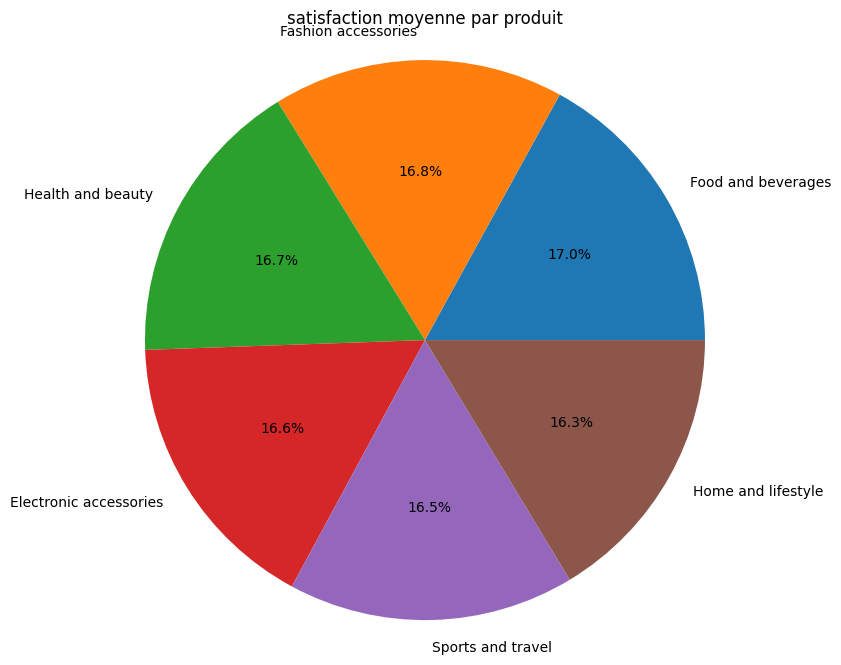

In [ ]:
SP = satisfaction_P.toPandas()

plt.figure(figsize=(10, 8))
plt.pie(SP['satisfaction_moyenne'] ,  labels = SP['Product line']  , autopct='%1.1F%%' )
plt.title("satisfaction moyenne par produit")
plt.axis('equal')
plt.show()

In [ ]:
from pyspark.sql.functions import month, year , col

data = data.withColumn("Year", year(col("Date")))
data = data.withColumn("Month", month("Date"))
data = data.withColumn("Year", year("Date"))

ventes_mensuelles = data.groupBy("Year", "Month").agg(F.sum("Sales").alias("CA_Mensuel")).orderBy("Year", "Month")

ventes_mensuelles.show()

+----+-----+------------------+
|Year|Month|        CA_Mensuel|
+----+-----+------------------+
|2019|    1|116291.86800000005|
|2019|    2| 97219.37399999997|
|2019|    3|109455.50700000004|
+----+-----+------------------+



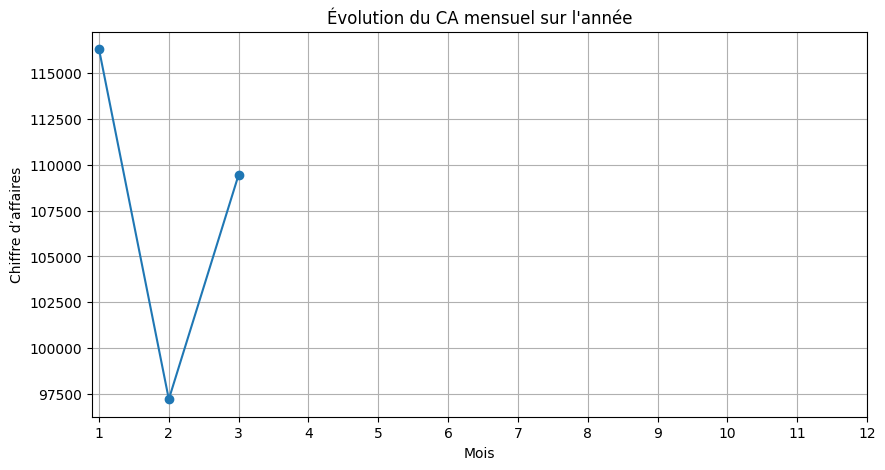

In [ ]:
ventes_mensuelles = data.groupBy("Month").agg(F.sum("Sales").alias("CA_Mensuel")).orderBy("Month")

ventes_M = ventes_mensuelles.toPandas()

plt.figure(figsize=(10,5))
plt.plot(ventes_M["Month"], ventes_M["CA_Mensuel"], marker="o")
plt.title("Évolution du CA mensuel sur l'année")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

In [ ]:
data.select("Year").distinct().orderBy("Year").show()

+----+
|Year|
+----+
|2019|
+----+



In [ ]:
data.select("Month").distinct().orderBy("Month").show()

+-----+
|Month|
+-----+
|    1|
|    2|
|    3|
+-----+



In [ ]:
data.select("Year", "Month").distinct().orderBy("Year", "Month").show()


+----+-----+
|Year|Month|
+----+-----+
|2019|    1|
|2019|    2|
|2019|    3|
+----+-----+



In [ ]:
ventes_par_date = data.groupBy("Date").agg(sum("Sales").alias("CA_journalier")).orderBy("Date")
ventes_par_date.show()

+----------+------------------+
|      Date|     CA_journalier|
+----------+------------------+
|2019-01-01|4745.1810000000005|
|2019-01-02|1945.5030000000002|
|2019-01-03|         2078.1285|
|2019-01-04|         1623.6885|
|2019-01-05|3536.6834999999996|
|2019-01-06|          3614.205|
|2019-01-07|2834.2439999999997|
|2019-01-08| 5293.732500000001|
|2019-01-09|3021.3435000000004|
|2019-01-10|3560.9490000000005|
|2019-01-11|         2114.9625|
|2019-01-12|         5184.7635|
|2019-01-13|          2451.204|
|2019-01-14|3966.6164999999996|
|2019-01-15|           5944.26|
|2019-01-16|          4289.082|
|2019-01-17|          3142.755|
|2019-01-18|2780.4734999999996|
|2019-01-19|         4914.7245|
|2019-01-20|3655.4489999999996|
+----------+------------------+
only showing top 20 rows



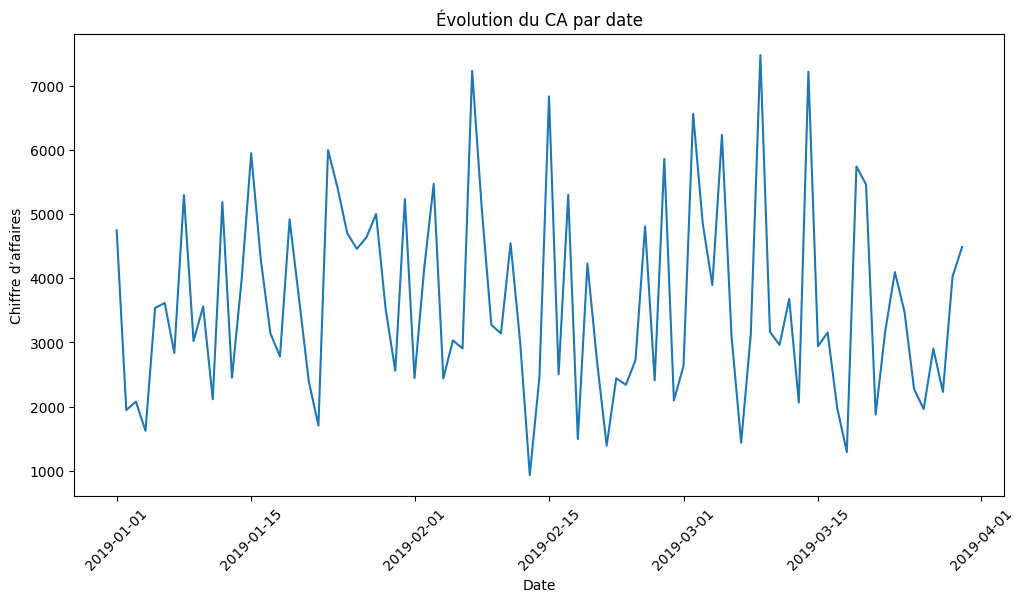

In [ ]:
pdf = ventes_par_date.toPandas()
plt.figure(figsize=(12,6))
plt.plot(pdf["Date"], pdf["CA_journalier"])
plt.title("Évolution du CA par date")
plt.xlabel("Date")
plt.ylabel("Chiffre d’affaires")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from pyspark.sql.functions import dayofweek, when, col

# ================ dayofweek() : 1 = dimanche, 2 = lundi, ..., 7 = samedi ===================
data = data.withColumn("day_of_week", dayofweek(col("Date")))



# ======================= la colonne WeekType ========================
data = data.withColumn(
    "WeekType",
    when(col("day_of_week").isin(1, 7), "Weekend").otherwise("Semaine")
)

data.select("Date", "day_of_week", "WeekType").show(10)

+----------+-----------+--------+
|      Date|day_of_week|WeekType|
+----------+-----------+--------+
|2019-01-05|          7| Weekend|
|2019-03-08|          6| Semaine|
|2019-03-03|          1| Weekend|
|2019-01-27|          1| Weekend|
|2019-02-08|          6| Semaine|
|2019-03-25|          2| Semaine|
|2019-02-25|          2| Semaine|
|2019-02-24|          1| Weekend|
|2019-01-10|          5| Semaine|
|2019-02-20|          4| Semaine|
+----------+-----------+--------+
only showing top 10 rows



In [ ]:
VSW = data.groupBy("WeekType").agg(F.sum("Sales").alias("CA"))
VSW.show()

+--------+------------------+
|WeekType|                CA|
+--------+------------------+
| Semaine|222388.04699999993|
| Weekend|100578.70199999998|
+--------+------------------+



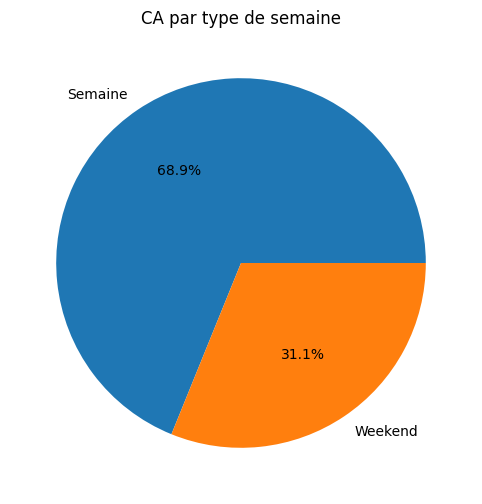

In [ ]:
vsw = VSW.toPandas()

plt.figure(figsize=(8,6))
plt.pie(vsw['CA'] ,  labels = vsw['WeekType']  , autopct='%1.1F%%' )
plt.title("CA par type de semaine")
plt.show()

# **Clients**

In [ ]:
comparaison_clients = data.groupBy("Customer type").agg(avg("Sales").alias("Moyenne_Sales"), sum("Sales").alias("CA_total")).orderBy(desc("CA_total"))
comparaison_clients.show()

+-------------+-----------------+------------------+
|Customer type|    Moyenne_Sales|          CA_total|
+-------------+-----------------+------------------+
|       Member|335.7429451327431|189694.76399999985|
|       Normal|306.3723793103448|        133271.985|
+-------------+-----------------+------------------+



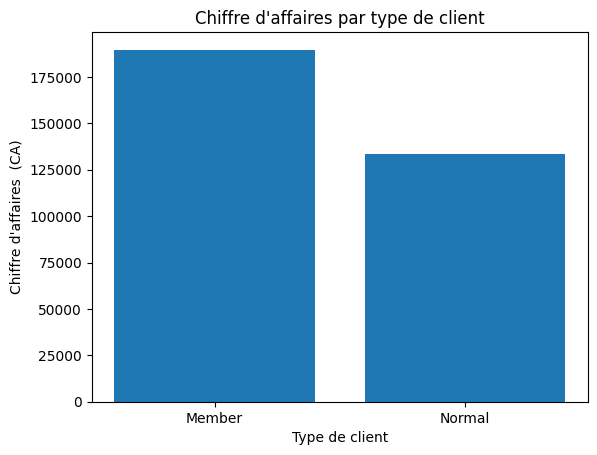

In [ ]:
Compa_client = comparaison_clients.toPandas()
plt.bar(Compa_client['Customer type'] , Compa_client['CA_total']  )
plt.title("Chiffre d'affaires par type de client")
plt.xlabel("Type de client")
plt.ylabel("Chiffre d'affaires  (CA)")
plt.show()

# **Moyen de paiement**

In [ ]:
CP = data.groupBy('Payment').agg(F.count('Sales').alias('NBR/PAIEMENT'))
CP.show()

+-----------+------------+
|    Payment|NBR/PAIEMENT|
+-----------+------------+
|    Ewallet|         345|
|       Cash|         344|
|Credit card|         311|
+-----------+------------+



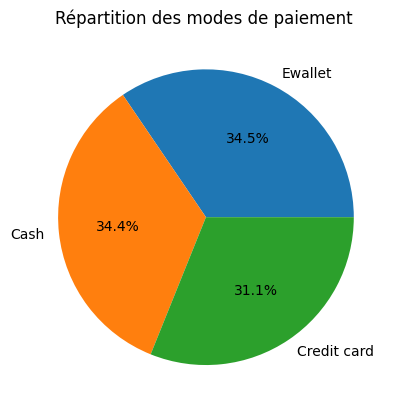

In [ ]:
nbr_v_par_paiement = CP.toPandas()
plt.pie(nbr_v_par_paiement['NBR/PAIEMENT'] , labels = nbr_v_par_paiement['Payment'] , autopct='%1.1F%%' )
plt.title("Répartition des modes de paiement ")
plt.show()

# **Conclusion de l’analyse des ventes**

Parfait 👍 tu as déjà une excellente base.
Là, tes nouveaux résultats apportent encore plus de **profondeur** à ton analyse, donc ta conclusion peut être enrichie pour montrer :

1. **La répartition géographique du CA et des marges**
2. **Les différences de comportement par ville** (transactions, panier moyen, produits favoris)
3. **La perception des prix et l’éventail des produits**

---

Voici une version reformulée et enrichie de ta conclusion en Markdown pour ton notebook :

---

# 📊 Synthèse des performances commerciales

## ⚡ Performances globales

* **Chiffre d'affaires total** : 322 966
* **Marge totale** : 15 379
* **Panier moyen global** : 322

Ces chiffres confirment une performance commerciale solide, avec une marge nette d'environ **4,8%**.

---

## 🏙️ Performance par ville

* **Naypyitaw** :

  * **CA le plus élevé** : 110 568
  * **Marge la plus importante** : 5 265
  * **Nombre de transactions le plus faible** : 328
  * **Panier moyen le plus élevé** : 337

  👉 Cela montre que **la rentabilité provient de la valeur des transactions** plutôt que de leur volume.

* **Yangon** :

  * **CA proche de Naypyitaw** : 106 200
  * **Transactions les plus nombreuses** : 340
  * **Panier moyen plus bas** : 312

  👉 Ici, la stratégie repose sur **le volume des ventes** et non la valeur par transaction.

* **Mandalay** :

  * **CA similaire à Yangon** : 106 197
  * **Transactions moyennes** : 332
  * **Panier moyen intermédiaire** : 319

  👉 Position intermédiaire entre Naypyitaw et Yangon.

---

## 🛒 Produits les plus consommés par ville

* **Mandalay** → *Sports and travel* (322 ventes)
* **Naypyitaw** → *Food and beverages* (369 ventes)
* **Yangon** → *Home and lifestyle* (371 ventes)

Ces différences illustrent des **préférences locales nettes**, utiles pour des campagnes marketing ciblées.

---

## 💳 Tendances de paiement et clientèle

* **Mode de paiement dominant** : l'**E-wallet**, sauf à Naypyitaw où le **cash** reste majoritaire.
* **Type de client le plus rentable** : les **membres fidèles**, avec **189 694** de CA généré.

👉 La fidélisation client est un véritable levier de croissance.

---

## 💰 Structure des prix

Le prix unitaire maximum atteint environ **100** dans toutes les catégories.
Cela montre une **uniformité des plafonds tarifaires** entre les lignes de produits, avec des variations faibles d’une catégorie à l’autre.

---

## 📅 Performances selon les jours

* **Ventes en semaine** : 222 388 (**68% du CA**)
* **Ventes le week-end** : 100 578

👉 L’activité est donc **principalement concentrée en semaine**, ce qui doit guider les politiques de stocks et de ressources.

---

✨ **En résumé** : Naypyitaw est la ville la plus rentable grâce à un **panier moyen élevé**, alors que Yangon repose sur un **volume plus important de transactions**.
Les comportements d’achat diffèrent fortement selon la ville (produits et modes de paiement), ce qui ouvre la voie à des **stratégies locales personnalisées**.

---

Veux-tu que je te prépare aussi une **visualisation finale (dash-style avec barplots/piecharts)** pour accompagner cette conclusion dans ton notebook ? Ça mettrait bien en valeur tes trouvailles.
